# Computer Vision Demo

This notebook walks through setting up and training a computer vision model on a fashion image dataset.

Autoreload project dependencies so we don't need to restart the kernel when changing our code.

In [1]:
%load_ext autoreload
%autoreload 1
%aimport src.config
%aimport src.data
%aimport src.model
%aimport src.pipeline


LOG_DIR = src.config.LOG_DIR  # type: ignore
DEVICE = src.config.DEVICE  # type: ignore

Data = src.data.Data  # type: ignore
Model = src.model.Model  # type: ignore
Pipeline = src.pipeline.Pipeline  # type: ignore

Using cuda device


Define hyperparameters.

In [2]:
BATCH_SIZE = 100
REPORTING_BATCHES = 100
LEARNING_RATE = 1e-3
EPOCHS = 25

Instantiate TensorBoard for observability.

In [3]:
import os
import time

from torch.utils.tensorboard import writer

timestamp = str(int(time.time()))

summary_writer = writer.SummaryWriter(os.path.join(LOG_DIR, timestamp, "tensorboard"))

Visualize our dataset. Images are also sent to TensorBoard.

Source: https://github.com/zalandoresearch/fashion-mnist

Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms. Han Xiao, Kashif Rasul, Roland Vollgraf. [arXiv:1708.07747](https://arxiv.org/abs/1708.07747)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: /home/xaoz/workspace/cv_demo/src/../data
    Split: Train
    StandardTransform
Transform: Compose(
                 ToImage()
                 ToDtype(scale=True)
                 RandomHorizontalFlip(p=0.5)
                 RandomRotation(degrees=[-5.0, 5.0], interpolation=InterpolationMode.NEAREST, expand=False, fill=0)
           )

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: /home/xaoz/workspace/cv_demo/src/../data
    Split: Test
    StandardTransform
Transform: Compose(
                 ToImage()
                 ToDtype(scale=True)
           )

Feature batch shape: torch.Size([100, 1, 28, 28])

Labels batch shape: torch.Size([100])

Classes: ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

First batch examples in image below.


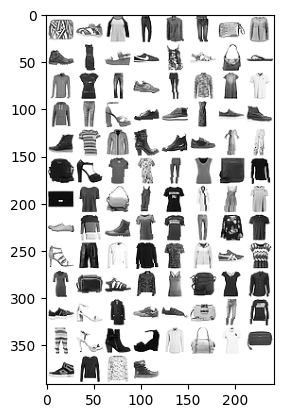

In [4]:
data = Data(batch_size=BATCH_SIZE, summary_writer=summary_writer)
data.get_data()
data.inspect_data()

Prepare our model, loss function, optimizer and training pipeline.

In [5]:
from torch import nn
from torch.optim.adam import Adam

model = Model().to(DEVICE)
loss_fn = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=LEARNING_RATE)

pipeline = Pipeline(data, model, loss_fn, optimizer, REPORTING_BATCHES, summary_writer)

Train and evaluate the model. Outputs to TensorBoard for monitoring.

In [6]:
pipeline.process(epochs=EPOCHS)

Epoch: 1

Training batch 100 loss: 0.9718
Training batch 200 loss: 0.6139
Training batch 300 loss: 0.5168
Training batch 400 loss: 0.4784
Training batch 500 loss: 0.4630
Training batch 600 loss: 0.4223
Test Error: 
 Accuracy: 85.6%, Avg loss: 0.397267 

Epoch: 2

Training batch 700 loss: 0.4187
Training batch 800 loss: 0.3862
Training batch 900 loss: 0.3763
Training batch 1000 loss: 0.3784
Training batch 1100 loss: 0.3742
Training batch 1200 loss: 0.3686
Test Error: 
 Accuracy: 87.9%, Avg loss: 0.332905 

Epoch: 3

Training batch 1300 loss: 0.3523
Training batch 1400 loss: 0.3437
Training batch 1500 loss: 0.3431
Training batch 1600 loss: 0.3503
Training batch 1700 loss: 0.3241
Training batch 1800 loss: 0.3225
Test Error: 
 Accuracy: 88.2%, Avg loss: 0.322700 

Epoch: 4

Training batch 1900 loss: 0.3182
Training batch 2000 loss: 0.3184
Training batch 2100 loss: 0.3165
Training batch 2200 loss: 0.3027
Training batch 2300 loss: 0.3073
Training batch 2400 loss: 0.3042
Test Error: 
 Accurac

Demonstrate inference.

In [7]:
import torch
from torch.utils.data import RandomSampler
from torch.utils.data import DataLoader


model.eval()

sampler = RandomSampler(data.test.dataset, replacement=True, num_samples=10)
test_data = DataLoader(data.test.dataset, batch_size=10, sampler=sampler)

with torch.no_grad():
    test_inputs, labels = next(iter(test_data))
    test_inputs, labels = test_inputs.to(DEVICE), labels.to(DEVICE)
    predictions = model(test_inputs)

    for i, prediction in enumerate(predictions):
        predicted_class = data.classes[prediction.argmax(0)]
        actual_class = data.classes[labels[i]]

        print(
            f'{'✔' if predicted_class == actual_class else '❌'} - Predicted: "{predicted_class}", Actual: "{actual_class}"'
        )

✔ - Predicted: "Dress", Actual: "Dress"
✔ - Predicted: "Trouser", Actual: "Trouser"
✔ - Predicted: "Bag", Actual: "Bag"
✔ - Predicted: "Dress", Actual: "Dress"
✔ - Predicted: "Sandal", Actual: "Sandal"
✔ - Predicted: "Dress", Actual: "Dress"
✔ - Predicted: "Sandal", Actual: "Sandal"
✔ - Predicted: "Sneaker", Actual: "Sneaker"
✔ - Predicted: "Trouser", Actual: "Trouser"
✔ - Predicted: "Sandal", Actual: "Sandal"
